## Observations and Insights 

In [95]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

# Observations
# 1. Among the four drug regimens selected, Capomulin and Ramicane showed the smallest tumor volumes at the lastest timepoint.
# 2. The top 2 most frequently tested drugs were Capomulin and Ramicane.
# 3. The mice's weight seems to be somewhat correlated with the average size of the tumor.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count=df["Mouse ID"].unique()
m=pd.Series(mice_count)
m_count=m.count()
m_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#come back to this

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dups=df[df.duplicated(["Mouse ID", "Timepoint"])]
df_dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [96]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_mice=df.sort_values("Mouse ID").drop_duplicates(subset =["Mouse ID","Timepoint"])
df_mice.dtypes
df_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
1295,a203,25,56.793208,1,Infubinol,Female,20,23
1675,a203,40,63.593490,2,Infubinol,Female,20,23
1577,a203,35,61.931650,2,Infubinol,Female,20,23


In [97]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean=df_mice["Mouse ID"].unique()
m2=pd.Series(mice_count_clean)
m_count_clean=m2.count()
m_count_clean

249

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_regimen=df_mice[["Drug Regimen","Tumor Volume (mm3)"]]
df_mean=round(df_regimen.groupby(["Drug Regimen"]).mean(),2)
df_mean_r=df_mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
df_mean_r
df_median=round(df_regimen.groupby(["Drug Regimen"]).median(),2)
df_median_r=df_median.rename(columns={"Tumor Volume (mm3)": "Median"})
df_median_r
df_var=round(df_regimen.groupby(["Drug Regimen"]).var(),2)
df_var_r=df_var.rename(columns={"Tumor Volume (mm3)": "Variance"})
df_var_r
df_std=round(df_regimen.groupby(["Drug Regimen"]).std(),2)
df_std_r=df_std.rename(columns={"Tumor Volume (mm3)": "Standard Dev"})
df_std_r
df_sem=round(df_regimen.groupby(["Drug Regimen"]).sem(),2)
df_sem_r=df_sem.rename(columns={"Tumor Volume (mm3)": "SEM"})
df_sem_r

df_merge=pd.concat([df_mean_r,df_median_r,df_var_r,df_std_r,df_sem_r],axis=1)
df_merge
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
df_summary=df_mice[["Drug Regimen","Tumor Volume (mm3)"]]
df_agg=round(df_summary.groupby(["Drug Regimen"]).agg([np.mean, np.median, np.var, np.std, st.sem]),2)
df_agg


# This method produces everything in a single groupby function


C:\Users\djack\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\djack\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\djack\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

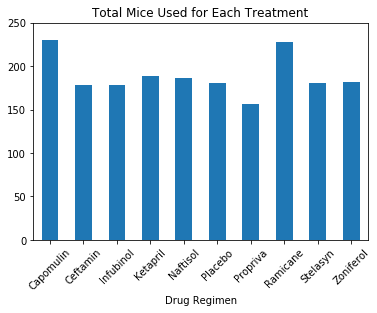

In [100]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df_mice2=df_mice[["Mouse ID", "Drug Regimen"]]
df_drug=round(df_mice2.groupby(["Drug Regimen"]).count(),2)
df_drug_r=df_drug.reset_index()
df_drug_r

bar_plot=df_drug_r.plot(x="Drug Regimen", y= "Mouse ID", rot= 45, kind="bar", legend=None, title="Total Mice Used for Each Treatment", ylim=(0,250))
bar_plot


(0, 250)

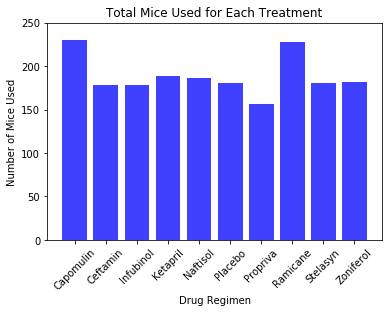

In [101]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
df_mice2=df_mice[["Mouse ID", "Drug Regimen"]]
df_drug=round(df_mice2.groupby(["Drug Regimen"]).count(),2)
df_drug_r=df_drug.reset_index()
df_drug_r

plt.bar(df_drug_r["Drug Regimen"], df_drug_r["Mouse ID"], color='b', alpha=.75, align="center")
plt.xticks(rotation=45)
plt.title("Total Mice Used for Each Treatment")
plt.ylabel("Number of Mice Used")
plt.xlabel("Drug Regimen")
plt.ylim(0, max(df_drug_r["Mouse ID"])+20)



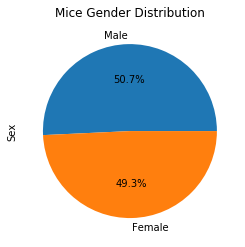

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_mice["Sex"].value_counts()
pie_plot=df_mice["Sex"].value_counts().plot(kind="pie", title="Mice Gender Distribution", autopct='%1.1f%%', legend=None)
pie_plot

Text(0.5, 1.0, 'Mice Gender Distribution')

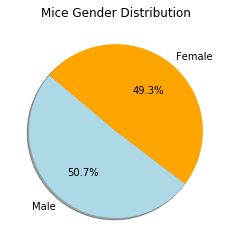

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["lightblue", "orange"]
explode = (0.1, 0, 0, 0)
plt.pie(df_mice["Sex"].value_counts(), labels= ["Male", "Female"], colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mice Gender Distribution")

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df_2=df_mice[["Mouse ID", "Timepoint"]]
df_max=df_2.groupby(["Mouse ID"]).max()
df_max_r=df_max.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df_merge=pd.merge(df_max_r, df_mice, on=["Mouse ID", "Timepoint"], how="left")
df_merge.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
     
# Locate the rows which contain mice on each drug and get the tumor volumes

df_merge_r=df_merge.set_index(["Drug Regimen"])
df_merge_r
Tumor_vol_Cap=df_merge_r.loc["Capomulin", ["Tumor Volume (mm3)"]]
Tumor_vol_Cap
quartiles_Cap = round(Tumor_vol_Cap.quantile([.25,.5,.75], interpolation="nearest"),2)
quartiles_Cap
lowerq_Cap = quartiles_Cap.iloc[0,0]
upperq_Cap = quartiles_Cap.iloc[2,0]
iqr_Cap = round(upperq_Cap-lowerq_Cap,2)
lower_bound_Cap = round(lowerq_Cap - (1.5*iqr_Cap),2)
upper_bound_Cap = round(upperq_Cap + (1.5*iqr_Cap),2)

Tumor_vol_Ram=df_merge_r.loc["Ramicane", ["Tumor Volume (mm3)"]]
Tumor_vol_Ram
quartiles_Ram = round(Tumor_vol_Ram.quantile([.25,.5,.75]),2)
lowerq_Ram = quartiles_Ram.iloc[0,0]
upperq_Ram = quartiles_Ram.iloc[2,0]
iqr_Ram = round(upperq_Ram-lowerq_Ram,2)
lower_bound_Ram = round(lowerq_Ram - (1.5*iqr_Ram),2)
upper_bound_Ram = round(upperq_Ram + (1.5*iqr_Ram),2)

Tumor_vol_Inf=df_merge_r.loc["Infubinol", ["Tumor Volume (mm3)"]]
Tumor_vol_Inf
quartiles_Inf = round(Tumor_vol_Inf.quantile([.25,.5,.75]),2)
lowerq_Inf = quartiles_Inf.iloc[0,0]
upperq_Inf = quartiles_Inf.iloc[2,0]
iqr_Inf = round(upperq_Inf-lowerq_Inf,2)
lower_bound_Inf = round(lowerq_Inf - (1.5*iqr_Inf),2)
upper_bound_Inf = round(upperq_Inf + (1.5*iqr_Inf),2)

Tumor_vol_Cef=df_merge_r.loc["Ceftamin", ["Tumor Volume (mm3)"]]
Tumor_vol_Cef
quartiles_Cef = round(Tumor_vol_Cef.quantile([.25,.5,.75]),2)
lowerq_Cef = quartiles_Cef.iloc[0,0]
upperq_Cef = quartiles_Cef.iloc[2,0]
iqr_Cef = round(upperq_Cef-lowerq_Cef,2)
lower_bound_Cef = round(lowerq_Cef - (1.5*iqr_Cef),2)
upper_bound_Cef = round(upperq_Cef + (1.5*iqr_Cef),2)


print(f"The IQR of Tumor Volume w/ Capomulin regimen is: {iqr_Cap}")
print(f"The the median of Tumor Volume w/ Capomulin regimen is: {quartiles_Cap.iloc[1,0]} ")
print(f"Tumor Volume w/ Capomulin regimen values below {lower_bound_Cap} could be outliers.")
print(f"Tumor Volume w/ Capomulin regimen values above {upper_bound_Cap} could be outliers.")
print('-')
print(f"The IQR of Tumor Volume w/ Ramicane regimen is: {iqr_Ram}")
print(f"The the median of Tumor Volume w/ Ramicane regimen is: {quartiles_Ram.iloc[1,0]} ")
print(f"Tumor Volume w/ Ramicane regimen values below {lower_bound_Ram} could be outliers.")
print(f"Tumor Volume w/ Ramicane regimen values above {upper_bound_Ram} could be outliers.")
print('-')
print(f"The IQR of Tumor Volume w/ Infubinol regimen is: {iqr_Inf}")
print(f"The the median of Tumor Volume w/ Infubinol regimen is: {quartiles_Inf.iloc[1,0]} ")
print(f"Tumor Volume w/ Infubinol regimen values below {lower_bound_Inf} could be outliers.")
print(f"Tumor Volume w/ Infubinol regimen values above {upper_bound_Inf} could be outliers.")
print('-')
print(f"The IQR of Tumor Volume w/ Ceftamin regimen is: {iqr_Cef}")
print(f"The the median of Tumor Volume w/ Ceftamin regimen is: {quartiles_Cef.iloc[1,0]} ")
print(f"Tumor Volume w/ Ceftamin regimen values below {lower_bound_Cef} could be outliers.")
print(f"Tumor Volume w/ Ceftamin regimen values above {upper_bound_Cef} could be outliers.")
print('-')

# add subset 
# Determine outliers using upper and lower bounds


The IQR of Tumor Volume w/ Capomulin regimen is: 7.78
The the median of Tumor Volume w/ Capomulin regimen is: 38.13 
Tumor Volume w/ Capomulin regimen values below 20.71 could be outliers.
Tumor Volume w/ Capomulin regimen values above 51.83 could be outliers.
-
The IQR of Tumor Volume w/ Ramicane regimen is: 9.1
The the median of Tumor Volume w/ Ramicane regimen is: 36.56 
Tumor Volume w/ Ramicane regimen values below 17.91 could be outliers.
Tumor Volume w/ Ramicane regimen values above 54.31 could be outliers.
-
The IQR of Tumor Volume w/ Infubinol regimen is: 11.48
The the median of Tumor Volume w/ Infubinol regimen is: 60.17 
Tumor Volume w/ Infubinol regimen values below 36.83 could be outliers.
Tumor Volume w/ Infubinol regimen values above 82.75 could be outliers.
-
The IQR of Tumor Volume w/ Ceftamin regimen is: 15.58
The the median of Tumor Volume w/ Ceftamin regimen is: 59.85 
Tumor Volume w/ Ceftamin regimen values below 25.35 could be outliers.
Tumor Volume w/ Ceftamin reg

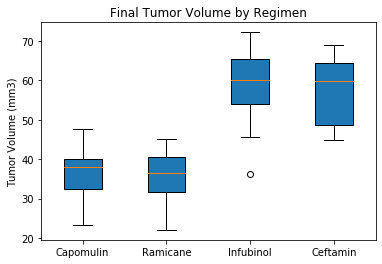

In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
value1=Tumor_vol_Cap["Tumor Volume (mm3)"]
value2=Tumor_vol_Ram["Tumor Volume (mm3)"]
value3=Tumor_vol_Inf["Tumor Volume (mm3)"]
value4=Tumor_vol_Cef["Tumor Volume (mm3)"]
box_plot_data=[value1,value2,value3,value4]
plt.boxplot(box_plot_data, labels=treatments, patch_artist=True, showfliers=True)
plt.title("Final Tumor Volume by Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

(30, 50)

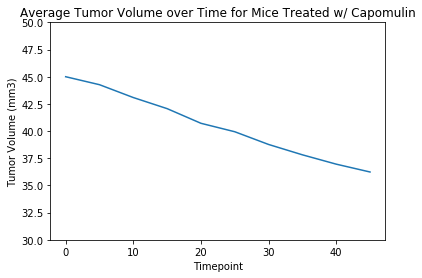

In [106]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
df_3=df_mice[["Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

df_line=df_3.groupby(["Drug Regimen", "Timepoint"]).mean()
df_line_2=df_line.loc["Capomulin", ["Tumor Volume (mm3)"]]
df_line_r=df_line_2.reset_index()

plt.plot(df_line_r["Timepoint"], df_line_r["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume over Time for Mice Treated w/ Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(30,50)

Text(0, 0.5, 'Tumor Volume (mm3)')

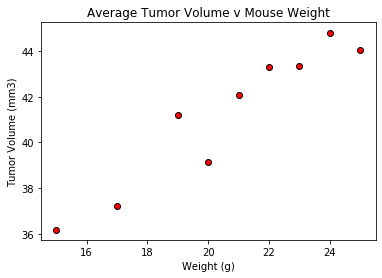

In [107]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
df_3=df_mice[["Weight (g)", "Tumor Volume (mm3)", "Drug Regimen"]]

df_line=df_3.groupby(["Drug Regimen", "Weight (g)"]).mean()
df_line_2=df_line.loc["Capomulin", ["Tumor Volume (mm3)"]]
df_line_r=df_line_2.reset_index()
df_line_r

plt.scatter(df_line_r["Weight (g)"], df_line_r["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black")
plt.title("Average Tumor Volume v Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

Correlation coefficient = 0.8947726097340637
Linear regression model = y = 0.89x + 22.76


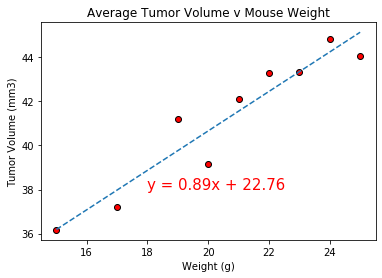

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(df_line_r["Weight (g)"], df_line_r["Tumor Volume (mm3)"])
fit = df_line_r["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(df_line_r["Weight (g)"], df_line_r["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black")
plt.title("Average Tumor Volume v Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.plot(df_line_r["Weight (g)"],fit,"--")

print(f'Correlation coefficient = {slope}')
print(f'Linear regression model = {line_eq}')